# GroupOneCode
### Import relevant dependencies

In [1]:
# import dependencies
%matplotlib inline
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from sodapy import Socrata
import gmaps
from config import g_keys
import matplotlib

### 2.Calling melbourne pedestrian data using Socrata

In [2]:
# historical data was able to get data from 2019 till date
client = Socrata("data.melbourne.vic.gov.au", app_token='zxKy8sLmqhCxio8QHuxhpWnYR',
                 username='russ.cheru@gmail.com', password='Harvey90')

# Selecting each year and setting the limit
results_2019 = client.get("b2ak-trbp", year= 2019, limit = 10000000)
results_2020 = client.get("b2ak-trbp", year= 2020, limit = 10000000)
results_2021 = client.get("b2ak-trbp", year= 2021, limit = 10000000)
# Note: only 5 months worth of data was collected in 2022
results_2022 = client.get("b2ak-trbp", year= 2022, limit = 10000000)

### 3. Reading data and saving to csv file

In [62]:
# read data for 2019
results_2019_df = pd.DataFrame.from_records(results_2019)
results_2020_df = pd.DataFrame.from_records(results_2020)
results_2021_df = pd.DataFrame.from_records(results_2021)
results_2022_df = pd.DataFrame.from_records(results_2022)

# saving the dataframe to csv format
results_2019_df.to_csv('foottraffic2019.csv')
results_2020_df.to_csv('foottraffic2020.csv')
results_2021_df.to_csv('foottraffic2021.csv')
results_2022_df.to_csv('foottraffic2022.csv')

# sample the dataframe for easy and quick iteration
results_2019_df.head()

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,2887628,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,2019-11-01T17:00:00.000,2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,2019-11-01T17:00:00.000,2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,2019-11-01T17:00:00.000,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,2019-11-01T17:00:00.000,2019,November,1,Friday,17,36,Queen St (West),774


## Data cleaning and wrangling
#### Team looked at the data types and changed the columns accordingly

In [63]:
# change the data to appropriate data types
data_type_dict = {"id":int,"year":int,"time":int,"hourly_counts":float}
results_2019_df = results_2019_df.astype(data_type_dict)
results_2020_df = results_2020_df.astype(data_type_dict)
results_2021_df = results_2021_df.astype(data_type_dict)
results_2022_df = results_2022_df.astype(data_type_dict)

In [5]:
# Group by months 
# use average to measure hourly counts per sensor
# average was used to depict a clear representation of the dataset since 2022 only has 5 months data
# Note: used sum but did not enable defnitive year on year comparative
month  = results_2019_df[["month", "hourly_counts"]].groupby("month").mean()
month1  = results_2020_df[["month", "hourly_counts"]].groupby("month").mean()
month2  = results_2021_df[["month", "hourly_counts"]].groupby("month").mean()
month3  = results_2022_df[["month", "hourly_counts"]].groupby("month").mean()


# convert to dictionaries for easy iteration in plotting line graph
months_dict_2019 = month.to_dict()
months_dict_2020 = month1.to_dict()
months_dict_2021 = month2.to_dict()
months_dict_2022 = month3.to_dict()

In [6]:
# sample view of hourly counts in all cbd sensor location per month
# Note: months in alphabetical order rather than months order format
month  = results_2019_df[["month", "hourly_counts"]].groupby("month").mean().reset_index()
month.head()

,month,hourly_counts
0,April,623.667423
1,August,599.812349
2,December,605.846079
3,February,569.499213
4,January,516.888664


In [7]:
# create proper months order
months_list=['January','February', 'March', 'April', 'May', 'June',
             'July', 'August', 'September','October','November','December']
months_list_22=['January','February','March','April','May']

### Line graph
#### Visual trend of melbourne CBD foot-traffic. According to the line charts, it is evident that Melbourne CDB foot-traffic has recovered and still is, following the lockdowns

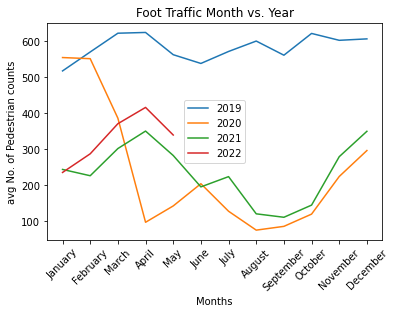

In [8]:
#Create Line chart representing 2019,2020,2021 and 2022 by hourly counts 
x = months_list
y = [months_dict_2019["hourly_counts"][i] for i in months_list]
y1 =[months_dict_2020["hourly_counts"][i] for i in months_list]
y2 =[months_dict_2021["hourly_counts"][i] for i in months_list]
y3 =[months_dict_2022["hourly_counts"][i] for i in months_list_22]

# plot lines
plt.plot(x, y,label = '2019')
plt.plot(x, y1,label = '2020')
plt.plot(x, y2,label = '2021')
plt.plot(months_list_22, y3,label = '2022')

plt.title('Foot Traffic Month vs. Year')
plt.xlabel('Months')
plt.xticks(rotation = 45)
plt.ylabel('avg No. of Pedestrian counts')
plt.legend(loc='best')
plt.show()

#### Having done the analysis, the key findings are:
##### There was a big drop in depestrian count in 2020 April due to the lockdown implemented in Victoria
##### This was followed by another drop in August to less than 100 average count per month because Melbourne entered another lockdown

### Bar Chart
#### The bar chart looks at top location in melbourne in terms of foottraffic counted hourly
#### Average hourly count was used to depict a representative measure for 2022 half yearly count
#### According to the bar-graphs, there is gradual change in foottraffic showing that Melbourne CBD has recovered and still is

In [9]:
# group the data using sensor_name
# get average of hourly counts 
# NOTE: used avg to get a clear representation of the data since 2022 data is 5 months worth of data collected
hourly_data=pd.DataFrame(results_2019_df.groupby('sensor_name').mean()['hourly_counts'])
hourly_data1=pd.DataFrame(results_2020_df.groupby('sensor_name').mean()['hourly_counts'])
hourly_data2=pd.DataFrame(results_2021_df.groupby('sensor_name').mean()['hourly_counts'])
hourly_data3=pd.DataFrame(results_2022_df.groupby('sensor_name').mean()['hourly_counts'])

# merge the data to create one dataframe
all_df=hourly_data.merge(hourly_data1, on='sensor_name', how='left')
all_df=all_df.merge(hourly_data2, on='sensor_name', how='left')
all_df=all_df.sort_values(['hourly_counts_x','hourly_counts_y','hourly_counts'], ascending=False)
all_df=all_df.rename(columns={'hourly_counts_x':'2019','hourly_counts_y':'2020','hourly_counts':'2021'})
all_df=all_df.merge(hourly_data3, on='sensor_name', how='left')
all_df=all_df.rename(columns={'hourly_counts':'2022'})
all_df=all_df.dropna().head(10).reset_index().rename(columns={'sensor_name':'location'})
all_df

,location,2019,2020,2021,2022
0,Flinders La-Swanston St (West),1935.517857,762.512637,950.287024,1312.665839
1,Town Hall (West),1447.970548,598.893898,702.630137,1030.714931
2,Flinders Street Station Underpass,1437.990753,516.921903,526.852495,729.920530
3,Spencer St-Collins St (North),1406.846110,483.883088,361.093151,592.782561
4,Bourke Street Mall (North),1350.731314,545.519012,594.591175,719.423565
5,Southbank,1251.323744,573.880735,740.735395,1182.980960
6,Princes Bridge,1234.883333,565.731899,648.222603,900.117550
7,Melbourne Central,1228.522744,478.120845,403.061047,883.459161
8,The Arts Centre,1110.263699,366.898495,452.682612,611.632174
9,Elizabeth St-La Trobe St (East),977.425725,503.188297,558.258219,628.606660


Text(0, 0.5, 'avg counts')

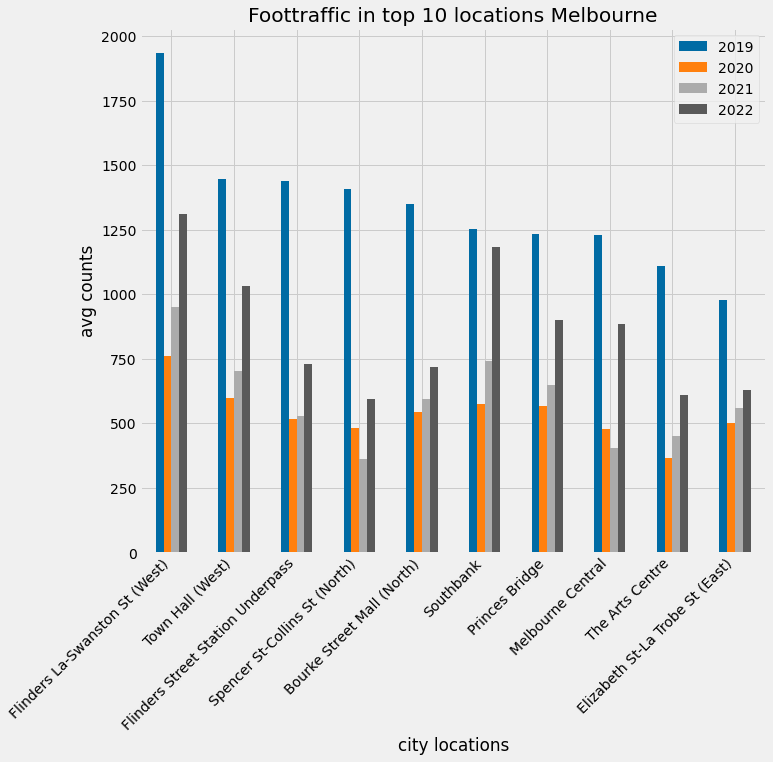

In [50]:
# plotting using matplotlib themes
matplotlib.style.use('tableau-colorblind10') 
all_df.plot(x='location', kind='bar',figsize=(10,9), grid=True)
plt.title('Foottraffic in top 10 locations Melbourne')
plt.xlabel('city locations',rotation_mode="anchor")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.ylabel('avg counts')

### Focus analysis on top location in the city of Melbourne
##### This section singels out one region with high foot traffic and analyses it by each day of the week and months in terms of morning, afternoon and evening foot traffic

In [11]:
# weekly average pedistrain at Melbourne top location according to foottraffic sensor counts
data_wk = pd.read_csv('foottraffic2022.csv')
data_wk = data_wk[['id','date_time','year','month','mdate','day','time','sensor_id','sensor_name','hourly_counts']]
#selected area
point='Flinders La-Swanston St (West)' #select sensor point
data_wk=data_wk[data_wk['sensor_name']==point]
weeks=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [12]:
# calculate weekly avaerage for particular day 

mors=[]
noons=[]
eves=[]
means=[]
for week in weeks:
    week_data=data_wk.groupby('day').get_group(week)  # group the data by week
    
    #divide by 23 to get average daily data in particular week
    mors.append(week_data[week_data['time'].between(7, 10)].hourly_counts.sum()/23)
    noons.append(week_data[week_data['time'].between(12, 15)].hourly_counts.sum()/23)
    eves.append(week_data[week_data['time'].between(18, 21)].hourly_counts.sum()/23)
    means.append(week_data.hourly_counts.sum()/23)

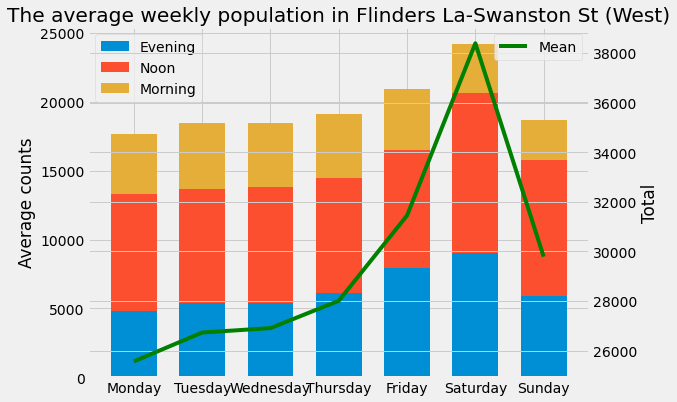

In [13]:
# plot the double-y axis plot with aggregated bar chart
plt.style.use('fivethirtyeight')#choose the style
#set the figure and x/y axis
plt.figure(figsize=(8,6))
x = weeks
y1 = np.array(eves)
y2 = np.array(noons)
y3 = np.array(mors)

#aggregate the barchart from diff period into one    
plt.bar(x, y1, bottom=0,label='Evening', width=0.67)
plt.bar(x, y2, bottom=y1, label='Noon', width=0.67)
plt.bar(x, y3, bottom=y1+y2, label='Morning', width=0.67)

#get back to the paint and draw another y-axis
ax=plt.gca()
ax2 = ax.twinx() #set the second ax cordinate for the mean
ax2.plot(x,[x for x in means],c='g',label='Mean')
plt.xlabel("Month",size=20)
ax.set_ylabel("Average counts")
ax2.set_ylabel("Total")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("The average weekly population in "+point)

plt.show()

##### the bar chart shows the average counts of pedestrian at different times of the day.
##### there are more people on Friday and Saturday than the rest of the week
##### the greenline displays the mean 
##### this would be important for the client to advice on busy days and staffing requirements

##### In summary,  looking at the chart potential investor might be interested in extending opening hours on Friday, Saturday and Sunday given the in increase in foottraffic outside regular meal times.

In [14]:
# checking monthly pedestrian trend in terms of foottraffic by selecting melbourne top location
# NOTE: the client can identify the desired location and this part of the code can be changed
# changing location requires passing in the desired location on the point location
data_mt = pd.read_csv('foottraffic2022.csv')
data_mt = data_mt[['id','date_time','year','month','mdate','day','time','sensor_id','sensor_name','hourly_counts']]
#selected area
point='Flinders La-Swanston St (West)'
data_mt=data_mt[data_mt['sensor_name']==point]
months=['January','February','March','April','May']

In [36]:
# calculate average monthly pendestrian data at the desired location 
mors=[]
noons=[]
eves=[]
means=[]
for month in months:
    month_data=data_mt.groupby('month').get_group(month) # group the data by month
    #divide by 30 to get average monthly data
    mors.append(month_data[month_data['time'].between(7, 10)].hourly_counts.mean()) 
    noons.append(month_data[month_data['time'].between(12, 15)].hourly_counts.mean())
    eves.append(month_data[month_data['time'].between(18, 21)].hourly_counts.mean())

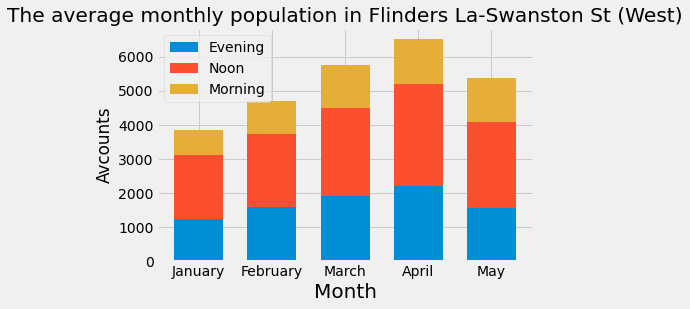

In [37]:
# plot the double-y axis plot with aggregated bar chart
plt.style.use('fivethirtyeight') #choose the style
#set the figure and x/y axis
plt.figure(figsize=(6,4)) 
x = months
y1 = np.array(eves)
y2 = np.array(noons)
y3 = np.array(mors)

#aggregate the barchart from different period into one  
plt.bar(x, y1, bottom=0,label='Evening', width=0.67)
plt.bar(x, y2, bottom=y1, label='Noon', width=0.67)
plt.bar(x, y3, bottom=y1+y2, label='Morning', width=0.67)

#get back to the point and draw another y-axis
ax=plt.gca()
plt.xlabel("Month",size=20)
ax.set_ylabel("Avcounts")
ax2.set_ylabel("Total")
ax.legend() 
ax2.legend(loc='upper right') 
plt.title("The average monthly population in "+point)

plt.show()

##### this graph shows the amount of foottraffic has increased month to month till April with a slight drop in May 

### Heatmap
#### This section produces heatmap for locations and foot traffic data of the city of Melbourne

In [38]:
# get location coordinates
hourly_data3=pd.DataFrame(results_2022_df.groupby('sensor_name').mean()['hourly_counts'])
hourly_data3=hourly_data3.sort_values('hourly_counts', ascending=False).reset_index()
hourly_data3.rename(columns={"sensor_name":"location",'hourly_counts':'Av foot traffic 2022'},inplace=True)
hourly_data3=hourly_data3.replace({"Town Hall (West)":"Town Hall"})
hourly_data3.head()

,location,Av foot traffic 2022
0,Flinders La-Swanston St (West),1312.665839
1,Southbank,1182.980960
2,Town Hall,1030.714931
3,Princes Bridge,900.117550
4,Melbourne Central,883.459161


In [18]:
Location_list = hourly_data3['location'].tolist()

# create empty lists
sensor_name = []
latitude = []
longitude = []
print('------------------\n2022 Melbourne Top foottraffic location\n------------------')
for i in Location_list:
    try:
        base_url = 'https://maps.googleapis.com/maps/api/geocode/json'
        target_location = i + ", Melbourne, Australia"
        params = {'address': target_location, 'key': g_keys}
        response = requests.get(base_url, params=params).json()
        lat = response['results'][0]['geometry']['location']['lat']
        lng = response['results'][0]['geometry']['location']['lng']
        print(f'{target_location}: {lat}, {lng}')
        sensor_name.append(i)
        latitude.append(lat)
        longitude.append(lng)
    except:
        print('Target location not found')
print('------------------------------\nThe End')

------------------
2022 Melbourne Top foottraffic location
------------------
Flinders La-Swanston St (West), Melbourne, Australia: -37.8164851, 144.9669885
Southbank, Melbourne, Australia: -37.82384, 144.9624973
Town Hall, Melbourne, Australia: -37.8150856, 144.9665653
Princes Bridge, Melbourne, Australia: -37.8192405, 144.9683463
Melbourne Central, Melbourne, Australia: -37.8123652, 144.9623382
Elizabeth St - Flinders St (East) - New footpath, Melbourne, Australia: -37.8181479, 144.9648712
State Library - New, Melbourne, Australia: -37.8098087, 144.9651897
Flinders Street Station Underpass, Melbourne, Australia: -37.8182711, 144.9670618
Bourke Street Mall (North), Melbourne, Australia: -37.8137685, 144.9644379
Melbourne Convention Exhibition Centre, Melbourne, Australia: -37.8252393, 144.9519166
Melbourne Central-Elizabeth St (East), Melbourne, Australia: -37.8102361, 144.9627652
Elizabeth St-La Trobe St (East), Melbourne, Australia: -37.8102887, 144.9614233
The Arts Centre, Melbourn

In [19]:
# create new df for location coordinate
location_dict = {
    'location': sensor_name,
    'lat': latitude,
    'lng': longitude,
    }
location_df = pd.DataFrame(location_dict)

location_df.head()

,location,lat,lng
0,Flinders La-Swanston St (West),-37.816485,144.966989
1,Southbank,-37.823840,144.962497
2,Town Hall,-37.815086,144.966565
3,Princes Bridge,-37.819240,144.968346
4,Melbourne Central,-37.812365,144.962338


In [28]:
# merging foot traffic data and coord data
summary = location_df.merge(hourly_data3,how='left', on='location')

# select longitude and latitude
coords=summary[['lat','lng']]

# use average hourly counts as weights
# convert it to float
weights=summary['Av foot traffic 2022'].astype(float)
max_weights=weights.max()

# plot 2019 foot-traffic heat maps
fig = gmaps.figure()

heat_maps1=gmaps.heatmap_layer(coords, 
                               weights=weights, 
                               max_intensity=1400)

fig.add_layer(heat_maps1)

fig

Figure(layout=FigureLayout(height='420px'))

### Markers on Heatmaps
#### Having narrowed down to top locations in Melbourne according to foottraffic, the group discussed on showing potential competitors by parsing in 'restaurant' keyword. This was able to list all the restaurants within the high density foottraffic locations.
#### Key reason for this point was to best advise potential investor on competition and restaurant type 

In [55]:
# Top location analysis
# create an empty column to parse in the accumulated number of competitors nearby the high foottraffic locations
summary ["Accum. No of Competition"] = ""

top_4_2022 = summary.iloc[0:4,:]
top_4_2022

,location,lat,lng,Av foot traffic 2022,Accum. No of Competition
0,Flinders La-Swanston St (West),-37.816485,144.966989,1312.665839,
1,Southbank,-37.823840,144.962497,1182.980960,
2,Town Hall,-37.815086,144.966565,1030.714931,
3,Princes Bridge,-37.819240,144.968346,900.117550,


In [56]:
# get general summary stats of the data
desc = summary["Av foot traffic 2022"].describe()
desc

count      72.000000
mean      325.370499
std       288.441582
min        31.432395
25%       120.517781
50%       214.853497
75%       416.108927
max      1312.665839
Name: Av foot traffic 2022, dtype: float64

In [57]:
# creating google heatmap for top location
# location & foot traffic input
lat_long = top_4_2022[["lat", "lng"]]
foottrafic = top_4_2022["Av foot traffic 2022"]

# Plot Heatmap
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(lat_long, weights=foottrafic, max_intensity=1400)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [58]:
# searching and adding all restaurant nearby
resto_name = []
resto_address = []
resto_lat = []
resto_lng = []

print('******\nRestaurants near high foottraffic locations are:\n******')
for index, row in top_4_2022.iterrows():
    phrase = f'restaurant in {row.location} Melbourne, Australia'
    target_url = 'https://maps.googleapis.com/maps/api/place/textsearch/json'
    params = {'query': phrase,'key': g_keys, 'radius': 100, 'type': 'restaurant'}
    response = requests.get(target_url, params).json()

    for place in response['results']:
        print(place["name"])
        resto_name.append(place["name"])
        resto_address.append(place["formatted_address"])
        resto_lat.append(place["geometry"]["location"]["lat"])
        resto_lng.append(place["geometry"]["location"]["lng"])
        top_4_2022.loc[index, "Accum. No of Competition"] = len (resto_name)
        
print('******\nEnd of restaurant search')

******
Restaurants near high foottraffic locations are:
******
The Trust
Lollo
Warabi
Lizzy
Culprit
Saluministi Flinders Lane
Tian38
Vapiano Flinders Lane
Go Hahn
Greta
Roule Galette
Akaiito Restaurant
Yarra Falls
Kim Sing Restaurant
Taxi Kitchen
Brunetti Oro Flinders Lane
Hazel
Shujinko Flinders
Cuff
Kenny's Bakery Cafe


/Users/russ/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


The Deck Southbank
La Camera Southgate
The Meat & Wine Co Southbank
Left Bank Melbourne Restaurant & Cocktail Bar
The Atlantic
Asado
Soho Restaurant and Bar
Saporito Taquito
Rockpool Bar & Grill
Miyako Japanese Cuisine & Teppanyaki
Bistro Guillaume
Rosetta Ristorante
Teatro Restaurant
Bluetrain
Spice Temple
The Breslin Bar & Grill
Eureka 89 Dining & Events - Fine Dining Restaurant Melbourne
Dee Casa - Restaurant & Bar
Tutto Bene
Nobu
Osteria Ilaria
Hazel
The Waiters Restaurant
Locanda Restaurant & Public Bar
Tipo 00
Trattoria Emilia
Rice Paper Scissors
Food hall
Pretty Boy Italian Steakhouse
Sezar Restaurant
Palermo Restaurant
Angliss Restaurant
Rare Steakhouse Uptown
Punch Lane Wine Bar & Restaurant
Meatmaiden
Choo Choo's
Vons Restaurant & Bar
Flower Drum Restaurant Melbourne
Mamasita
Sunda Dining
Riverland Bar
Spirit Of Melbourne Cruising Restaurant
Taxi Kitchen
Hazel
Pilgrim Bar
Ponyfish Island
Arbory Bar & Eatery
Mama's Canteen
Tippy-Tay
Eureka 89 Dining & Events - Fine Dining Rest

In [59]:
# Show accum. number of competition radius 100m of top location
top_4_2022

,location,lat,lng,Av foot traffic 2022,Accum. No of Competition
0,Flinders La-Swanston St (West),-37.816485,144.966989,1312.665839,20
1,Southbank,-37.823840,144.962497,1182.980960,40
2,Town Hall,-37.815086,144.966565,1030.714931,60
3,Princes Bridge,-37.819240,144.968346,900.117550,80


In [60]:
# Creating resto dataframe for heatmap marker
restaurant_dict = {"name": resto_name, "address": resto_address, "Lat": resto_lat, "Lon": resto_lng}
restaurant_df = pd.DataFrame(restaurant_dict)

restaurant_df.head(4)

,name,address,Lat,Lon
0,The Trust,"405 Flinders Ln, Melbourne VIC 3000, Australia",-37.818444,144.960517
1,Lollo,"408 Flinders Ln, Melbourne VIC 3000, Australia",-37.818276,144.960305
2,Warabi,"408 Flinders Ln, Melbourne VIC 3000, Australia",-37.818276,144.960305
3,Lizzy,"Flinders St, Melbourne VIC 3000, Australia",-37.819028,144.961508


In [61]:
# add restaurant marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Address</dt><dd>{address}</dd>
</dl>
"""

resto_info = [info_box_template.format(**row) for index, row in restaurant_df.iterrows()]
locations = restaurant_df[["Lat", "Lon"]]

# Add marker layer ontop of heat map
marker_layer=gmaps.marker_layer(locations, info_box_content=resto_info)
fig.add_layer(marker_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## Correlations

In [64]:
weather_data = pd.read_csv('IDCJAC0010_086338_2019_Data.csv')
weather_df= pd.DataFrame(weather_data)
# weather_df.head()

# Daily temperature data 2019 adjustment / cleaning
weather_df ["Month"] = weather_df ["Month"].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
                                                     7:"July",8:"August",9:"September",
                                                     10:"October",11:"November",12:"December"})
weather_df ["month&day"] = weather_df ["Month"].map(str) + weather_df ["Day"].map(str)
weather_df.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,month&day
0,IDCJAC0010,86338,2019,January,1,26.2,1,Y,January1
1,IDCJAC0010,86338,2019,January,2,22.2,1,Y,January2
2,IDCJAC0010,86338,2019,January,3,29.5,1,Y,January3
3,IDCJAC0010,86338,2019,January,4,42.6,1,Y,January4
4,IDCJAC0010,86338,2019,January,5,21.2,1,Y,January5


In [65]:
# to concatenate we ought to change mdate to string since month is a string
results_2019_df ["month&day"] = results_2019_df ["month"] + results_2019_df ["mdate"].map(str)
location_2019 = pd.DataFrame(results_2019_df.groupby("month&day").mean()['hourly_counts']).reset_index().dropna()
len(location_2019)

# Data Merging
weather_foottrafic_2019 = location_2019.merge(weather_df, how="left", on="month&day")
weather_foottrafic_2019.head()

,month&day,hourly_counts,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,April1,610.847500,IDCJAC0010,86338,2019,April,1,17.1,1,Y
1,April10,714.683333,IDCJAC0010,86338,2019,April,10,15.8,1,Y
2,April11,729.284167,IDCJAC0010,86338,2019,April,11,17.3,1,Y
3,April12,817.252500,IDCJAC0010,86338,2019,April,12,24.9,1,Y
4,April13,626.582500,IDCJAC0010,86338,2019,April,13,20.7,1,Y


The r-value is: 0.012467008841536361


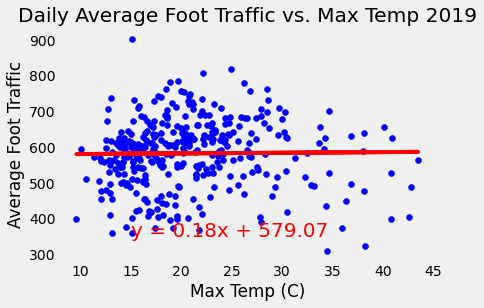

there was a weak correlation between weather and foottraffic in 2019


In [66]:
# Scatter plot & regression

x = weather_foottrafic_2019["Maximum temperature (Degree C)"]
y = weather_foottrafic_2019["hourly_counts"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (x,y, marker="o", facecolors="blue", alpha=1)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (15,350),fontsize=20,color="red")
plt.xlabel("Max Temp (C)")
plt.ylabel("Average Foot Traffic")
plt.title("Daily Average Foot Traffic vs. Max Temp 2019")
print(f"The r-value is: {rvalue}")
plt.grid()
plt.savefig("Fig1.png") 
plt.show()
print('there was a weak correlation between weather and foottraffic in 2019')

In [67]:
# foot traffic data 2019

results_2019_df_2 = results_2019_df.copy()
results_2019_df_2['Date'] = pd.to_datetime(results_2019_df_2["date_time"]).dt.date
results_2019_df_2.head()

# foot traffic data 2019 calculation
groupby_date = pd.DataFrame(results_2019_df_2.groupby("Date").mean()['hourly_counts']).reset_index()
groupby_date.head()

,Date,hourly_counts
0,2019-01-01,469.195578
1,2019-01-02,522.727891
2,2019-01-03,517.563776
3,2019-01-04,403.606293
4,2019-01-05,454.995833


The r-value is: 0.14195185271907146


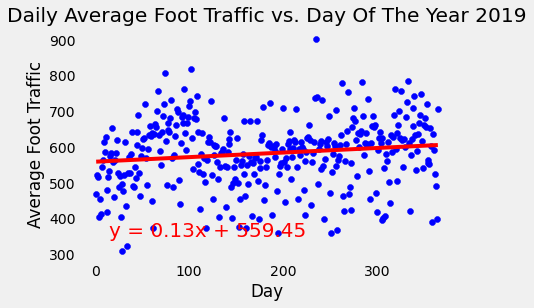

In [68]:
# Scatter plot & regression 

x = np.arange(1,366,1)
y = groupby_date['hourly_counts']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (x,y, marker="o", facecolors="blue", alpha=1)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (15,350),fontsize=20,color="red")
plt.xlabel("Day")
plt.ylabel("Average Foot Traffic")
plt.title("Daily Average Foot Traffic vs. Day Of The Year 2019")
print(f"The r-value is: {rvalue}")
plt.grid()
plt.savefig("Fig2.png") 
plt.show()

In [55]:
weather_data1 = pd.read_csv('IDCJAC0010_086338_2022_Data.csv')
weather_df1= pd.DataFrame(weather_data1)
# weather_df.head()

# Daily temperature data 2019 adjustment / cleaning
weather_df1["Month"] = weather_df1["Month"].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
                                                     7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
weather_df1["month&day"] = weather_df1["Month"].map(str) + weather_df1["Day"].map(str)
weather_df1.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,month&day
0,IDCJAC0010,86338,2022,January,1,37.1,1,Y,January1
1,IDCJAC0010,86338,2022,January,2,30.9,1,Y,January2
2,IDCJAC0010,86338,2022,January,3,20.3,1,Y,January3
3,IDCJAC0010,86338,2022,January,4,23.1,1,Y,January4
4,IDCJAC0010,86338,2022,January,5,29.3,1,Y,January5


In [56]:
# to concatenate we ought to change mdate to string since month is a string
results_2022_df ["month&day"] = results_2022_df ["month"] + results_2022_df ["mdate"].map(str)
location_2022 = pd.DataFrame(results_2022_df.groupby("month&day").mean()['hourly_counts']).reset_index().dropna()
len(location_2022)

# Data Merging
weather_foottrafic_2022 = location_2022.merge(weather_df1, how="left", on="month&day")
weather_foottrafic_2022.head()

,month&day,hourly_counts,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,April1,418.676136,IDCJAC0010,86338,2022,April,1,19.1,1,Y
1,April10,467.524621,IDCJAC0010,86338,2022,April,10,26.7,1,Y
2,April11,394.501894,IDCJAC0010,86338,2022,April,11,18.8,1,Y
3,April12,427.364899,IDCJAC0010,86338,2022,April,12,17.7,1,Y
4,April13,432.839015,IDCJAC0010,86338,2022,April,13,20.0,1,Y


The r-value is: -0.31295607416734783


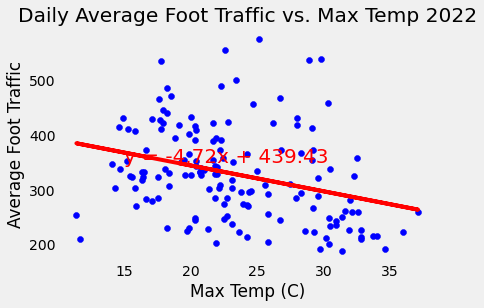

there is a weak correlation depicted by the scatter plot


In [57]:
# Scatter plot & regression

x = weather_foottrafic_2022["Maximum temperature (Degree C)"]
y = weather_foottrafic_2022["hourly_counts"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (x,y, marker="o", facecolors="blue", alpha=1)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (15,350),fontsize=20,color="red")
plt.xlabel("Max Temp (C)")
plt.ylabel("Average Foot Traffic")
plt.title("Daily Average Foot Traffic vs. Max Temp 2022")
print(f"The r-value is: {rvalue}")
plt.grid()
plt.savefig("Fig1.png") 
plt.show()
print('there is a weak correlation depicted by the scatter plot')